Es importante trazar de manera paralela distribuciones, con el fin de obtener más información y mejorar las inferencias que estamos haciendo sobre los datos.

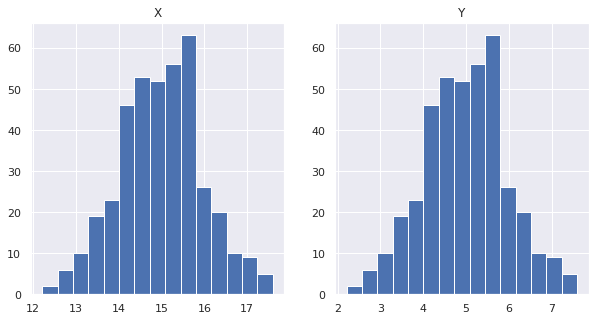

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from scipy import stats

# Si obtenemos un rho 1 significa que tendremos una línea perfecta
# inclinada hacia arriba.
# Si tenemos un rho -1 significa que la línea estará 
# inclinada hacia abajo.
# Y si el rho 0 significa nuve de puntos
# rho puede significar medida de dependencia entre variables.

r = 1

# Estas líneas se verán en el futuro
mean = [15,5]
cov = [[1,r], [r,1]]
x, y = x,y = np.random.multivariate_normal(mean, cov, 400).T

# Ajustando la figura
plt.figure(figsize=(10,5))

# Trazar histogramas uno al lado del otro
# Trazando X
plt.subplot(1,2,1)
plt.hist(x=x, bins=15)
plt.title("X")
# Trazando Y
plt.subplot(1,2,2)
plt.hist(x=y, bins = 15)
plt.title("Y")
plt.show()

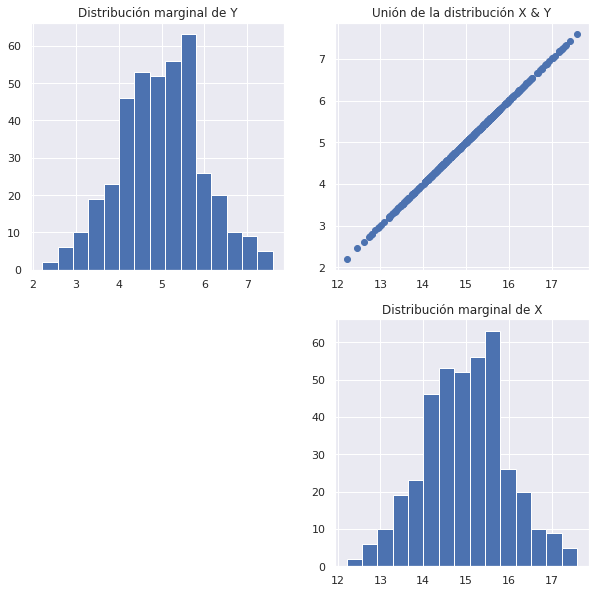

In [2]:
# Grafico de datos

plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x=x, y = y)
plt.title("Unión de la distribución X & Y")


# Distribución marginal de X
plt.subplot(2,2,4)
plt.hist(x=x, bins=15)
plt.title("Distribución marginal de X")
# Distribución marginal de Y
plt.subplot(2,2,1)
plt.hist(x=y, bins=15)
plt.title("Distribución marginal de Y")

plt.show()
# orientation = " horizontal" se puede aplicar a los histogramas

Esto nos va a permitir observar si los datos tienen una relación fuerte, moderada o debil, si la misma es negativa o positiva, y será un dato que a simple visto no podemos ver muchas veces viendo las gráficas de manera individual, viendo su dispersión y otros elementos.

## Análisis de datos Multivariados - Caso NHANES

Este ejercicio nos permitirá avanzar en las nociones y relaciones de los datos multivariantes. 

In [3]:
df = pd.read_csv("nhanes_2015_2016.csv")

### Datos Cuantitativos Bivariados

Los datos bivariados se generan cuando cada unidad de analisis, por ejemplo, una persona dentro del ocnjunto de datos que estamos viendo, se evalua con respecto a 2 rasgos a la vez.

Ahora, un gráfico de dispersión es una visualización común que permite entender con facilidad los datos bivariados. Como ejemplo, podemos hacer un gráfico de dispersión de la longitud de los brazos frente a la longitud de las piernas, la longitud de los brazos se traza en el eje vertical y el de las piernas en el horizontal, y podemos ver una dependencia positiva entre las dos medidas, es decir, que las personas con los brazos largos, tienden a tener piernas largas, sin embargo, el gráfico de dispersión nos permitirá ver que tipo de relación hay.

Debemos que tener elementos en cuenta, en un gráfico de dispersión con más de 100 puntos, el "sobretrazado" se convierte en un problema, eso quiere decir que muchos puntos caen uno encima del otro en el gráfico oscureciendo la distribución, y enfatizando demasiado determinadas porciones del gráfico, una forma en la que se puede evitar esto es utilizar un canal ALFA para que los puntos sean semitransparentes.

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

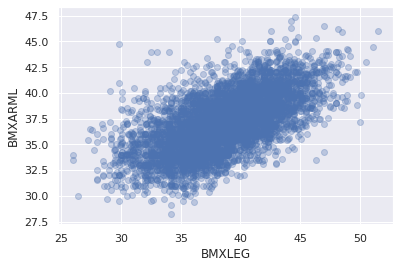

In [4]:
#sns.regplot(x="BMXLEG", y="BMXARML",data=df) # hasta aqui se vería el gráfico bien, pero los puntos coloreados
sns.regplot(x="BMXLEG", y="BMXARML",data=df, fit_reg=False, scatter_kws={"alpha":0.3})
# fit_reg=False -> elimina la regla que se traza
# scatter_kws={"alpha":0.3} -> da el nivel de color

Una forma diferente de trabajar con datos bivariados, es trabajar con gráficos de densidad, estos gráficos indicarán por los colores como recaen el número de puntos mayores, mostrando la densidad conjunta (centro del gráfico) y los margenes muestran las densidades de longitud de brazos y piernas.

Este gráfico es muy util porque muestra el coeficiente de correlación de Pearson entre la longitud de brazos y piernas, que para el caso es de 0.62. El coeficiente normalmente oscila entre 1 y -1, cuando los valores estan muy cerca a 1, sea positivo o negativo indica que hay una dependencia casi perficta, esta puede ser negativa o positiva, en algunos entornos se considera una dependencia que 0.62 es una dependencia moderadamente fuerte.

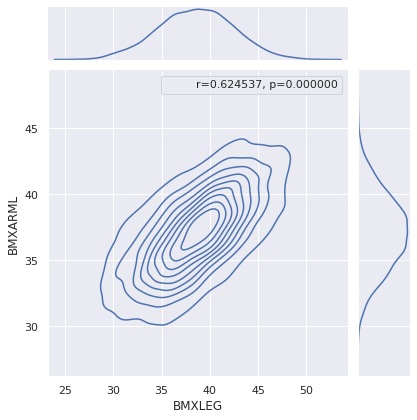

In [5]:
#sns.jointplot(x="BMXLEG", y = "BMXARML", data=df) # hasta este punto genera un gŕafico pero no de densidad
#kind="kde" -> se transforma en trazos el gráfico, como un mapa

# En el ejercicio deberia terminar así ->
# sns.jointplot(x="BMXLEG", y = "BMXARML", data=df, kind="kde").annotate(stats.pearsonr)
# Sin embargo este metodo annotate esta depredado, y ya no esta permitido, si se quisiera hacer debe ser en forma de
dP = df[["BMXLEG", "BMXARML"]].dropna()
grafico = sns.jointplot(x="BMXLEG", y = "BMXARML", data=df, kind="kde")
r, p = stats.pearsonr(dP.BMXLEG, dP.BMXARML) # -> esta es una forma de gráficar e incluir r y p, pero estos datos deben tener la misma longitud
phantom, = grafico.ax_joint.plot([], [], linestyle="", alpha=0)
grafico.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


# en el caso de r, p, en nuestros datos hay conjuntos vacios, es decir NaN por lo cual si no hay la misma cantidad
# de datos, lo que va a suceder es que no se grafique y de un error, en este caso dejamos la prueba de como hacerlo
# e imprimimos abajo los datos como deberian ser.


In [6]:
dP = df[["BMXLEG", "BMXARML"]].dropna()
r, p = stats.pearsonr(dP.BMXLEG, dP.BMXARML) # -> esta es una forma de gráficar e incluir r y p, pero estos datos deben tener la misma longitud
print(r,p)

0.6245370012742504 0.0


Podemos hacer el ejercicio con otras variables, por ejemplo viendo la presión arteriarl sistólica y diastólica, en este ejercicio podemos que hay una correlación debil que indica que la presión arterial sistólica es inusualmente alta, pero tiene una presión diastólica media y viceversa.

0.3165311034587997 5.783981008886146e-126


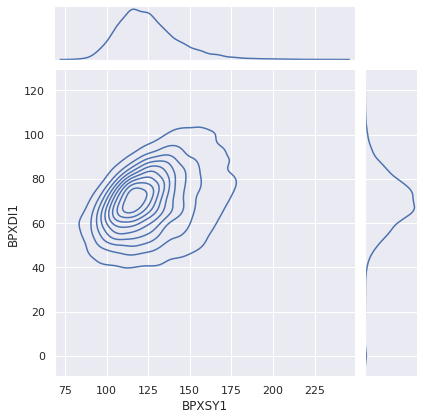

In [7]:
# Sacar stats pearsonr

# limpiar datos primero para evitar error
dL = df[["BPXSY1","BPXDI1"]].dropna()

r, p = stats.pearsonr(dL.BPXSY1, dL.BPXDI1)
print(r,p)

# podemos ahora gráficar como son nuestros datos

sns.jointplot(x="BPXSY1", y = "BPXDI1", data=df, kind="kde")





## Heterogeneidad y Estratificación

La mayoría de las características humanas son complejas, varian según sexo, edad, etnia, y otrso factores, a este tipo de variación sele suele denominar como heterogeneidad, cuando esta heterogeneidad esta presente, es muy productivo explorar los datos estratificando los factores relevantes.

Entonces, continuando con el mismo camino, podemos estratificar la logintid de brazos y piernas de las personas por género y por étnia. 

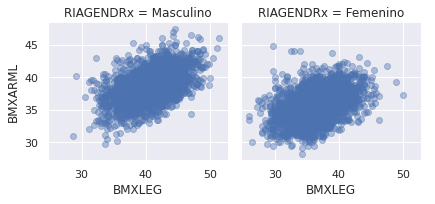

In [8]:
# crear columna de género

df["RIAGENDRx"] = df.RIAGENDR.replace({1:"Masculino",2:"Femenino"})
sns.FacetGrid(df, col="RIAGENDRx").map(plt.scatter,"BMXLEG","BMXARML",alpha=0.4).add_legend()

Por ejemplo, en este gráfico podemos ver que los hombres tienden a tener los brazos y las piernas más largos, lo que se refleja en que la curva de puntos se encuentra más extendida hacia la derecha, además la correlación pareciera ser más debil en las mujeres que en los hombres, para estar seguro de estos deberemos comparar el metodo de correlación por separado dentro de cada género.

El metodo de correlacion (corr) calcula los coeficientes de correlación para cada par de variables en el marco de los datos. Este metodo devuelve una matriz de correlaciones que es una talba que contiene cada par de variables del conjunto de datos. Hay que tener en cuenta que en esta matriz de correlaciones simpre habra 1nos, esto debido a que también se compara la variable consigo misma. La matriz de correlaciones también es simetrica en forma diagonal, debido a que la correlación de X & Y no depende del orden en que se consideren las variables. 

In [9]:
print(df.loc[df.RIAGENDRx=="Femenino", ["BMXLEG","BMXARML"]].dropna().corr())
print("--"*8)
print(df.loc[df.RIAGENDRx=="Masculino", ["BMXLEG","BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
----------------
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


Como datos importantes podemos ver que para el género femenino hay una correlación del 0.43, siendo una correlación baja positiva.

Para el género masculino la correlación es de 0.50, siendo una correlación moderada positva.

Si quisieramos estratificar los datos por género y por étnia, nos daría en promedio 10 estratos totales, esto debido a que en nuestros datos hay 2 géneros y 5 étnias diferentes, así, dentro de estos datos estadísticos podremos revelar las diferencias en las medias, las diferencias en el grado de asociación/correlación entre las distintas variables por factor. 

Observaciones. La relación entre longitud de brazos y piernas por género es mas o menos similiar en todos los grupos étnicos, igualmente, es notable que en el grupo étnico 5, las personas que se declaran multiraciales o de cualquier raza no tratadas como un grupo por separado (pequeño tamaño en la muestra), su correlación en longitud de piernas y brazos especialmente para el género masculino es mas fuerte, esto puede deberse a que a una mayor heterogeneidad puede que se generen correlaciones que son indicernible en datos más homogéneos.

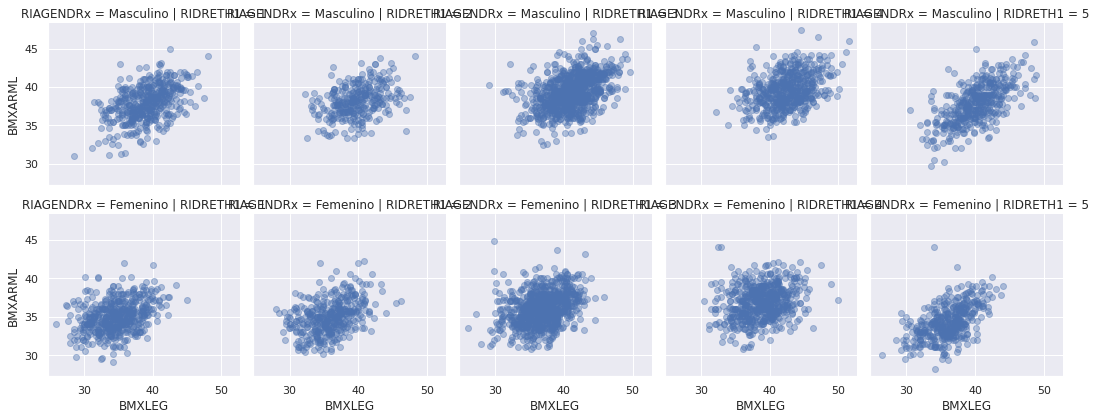

In [10]:
_ = sns.FacetGrid(df, col="RIDRETH1",row="RIAGENDRx").map(plt.scatter, "BMXLEG","BMXARML",alpha=0.4).add_legend()

# Datos Bivariados Categóricos

Para trabajar con datos categóricos bivariados podemos trabajar con tablas de contingencia, que cuenta el número de persona que tienen cada combinación por dos factores.

Por ejemplo, el estado civil y de educación son dos datos categoricos que podemos representar en una tabla de contingencia. 
Primero vamos a escribir palabras para representar el conjunto de datos que respondieron "No sé" o se negaron a responder. 

In [11]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1:"<9",2:"9-11",
                                      3:"Posgd",4:"U - Proceso",
                                      5:"Graduada", 7:"Niega",
                                      9:"No/Sbe"})
df["DMDMARTLx"] = df.DMDMARTL.replace({1:"Casado",2:"Viudo",
                                       3:"Divorciado",4:"Separado",
                                       5:"Nunca casdo", 6:"V.Pareja",
                                       77:"Niega"})

da = df.loc[(df.DMDEDUC2x != "No/Sbe") & (df.DMDMARTLx != "Niega"),:]

Se construye la tabla con el número de personas en cada celda definida por la combinación de los dos variables categóricas.

In [12]:
x = pd.crosstab(da.DMDEDUC2x, da.DMDMARTLx)
x

DMDMARTLx,Casado,Divorciado,Nunca casdo,Separado,V.Pareja,Viudo
DMDEDUC2x,,,,,,
9-11,305,62,117,39,80,40
<9,341,52,65,43,66,88
Graduada,827,120,253,22,85,59
Posgd,550,127,237,40,133,99
U - Proceso,757,217,332,42,163,108


Lo más conveniente es normalizar los resultados para poder interpretar los datos de maner sencilla, de esta manera tenemos 3 opciones para hacerlo.

1. Podemos hacer que las filas sumen 1, que las columnas sumen 1 o que toda la tabla sume 1. Esto nos dará la proporción de personas en cada categoría del nivel educativo que que estan en cada grupo de estado civil.

El estado civil modal (más común) de las personas dentro de cada grupo de nivel educativo es "csado", sin embargo, cuantitativamente la proporción de personas que estan casadas varia sustancialmente, y es notablemente más alta para los grupos de graduados universitarios ocn al rededor del 61%, en comparación con grupos de menor nivel educativo. 

In [13]:
x.apply(lambda z:(z/z.sum()), axis=1) #1 -> fila

DMDMARTLx,Casado,Divorciado,Nunca casdo,Separado,V.Pareja,Viudo
DMDEDUC2x,,,,,,
9-11,0.474339,0.096423,0.181960,0.060653,0.124417,0.062208
<9,0.520611,0.079389,0.099237,0.065649,0.100763,0.134351
Graduada,0.605417,0.087848,0.185212,0.016105,0.062225,0.043192
Posgd,0.463744,0.107083,0.199831,0.033727,0.112142,0.083474
U - Proceso,0.467573,0.134033,0.205065,0.025942,0.100679,0.066708


En este caso, podríamos normalizar dentro de las columnas en lugar de normalizar dentro de las filas, esto nos da la proporción de personas con cada grupo de estado civil que tienen nivel de educación. 

In [14]:
x.apply(lambda z:(z/z.sum()), axis=0) # 0 -> columna

# se cuentan la proporción de personas con estudio por cada grupo civil y de estudios

DMDMARTLx,Casado,Divorciado,Nunca casdo,Separado,V.Pareja,Viudo
DMDEDUC2x,,,,,,
9-11,0.109712,0.107266,0.116534,0.209677,0.151803,0.101523
<9,0.122662,0.089965,0.064741,0.231183,0.125237,0.223350
Graduada,0.297482,0.207612,0.251992,0.118280,0.161290,0.149746
Posgd,0.197842,0.219723,0.236056,0.215054,0.252372,0.251269
U - Proceso,0.272302,0.375433,0.330677,0.225806,0.309298,0.274112


En esta tabla la pluralidad de personas divorciadas tienen algun nivel de estudios, pero no se han graduado de la universidad, mientras que la pluralidad de personas casadas son graduadas universitarias

También es posible encontrar diferencias incluyendo el factor del género en relación con el nivel educativo y el estado civil, así se puede observar cada categoría de estado civil para la combinación de variables de género y educación.

El analisis puede mostrar tendencias interesantes, sobre todo de las mujeres que tienen más probabilidades de ser viudas o divorciadas que los hombres (Posgrado tienen 3 veces más probabilidad de ser viudas que los hombres del mismo grupo)

In [15]:
# La siguiente línea realiza estos pasos, leyendo el código de izquierda a derecha:
# 1 Agrupa los datos por cada combinación de género, educación y estado civil
# 2 Cuenta el número de personas en cada celda usando el método 'size'
# 3 Pivotar los resultados del estado civil en las columnas (usando unstack)
# 4 Rellene las celdas vacías con 0
# 5 Normalizar los datos por fila

da.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: (x/x.sum())*100, axis=1)

DMDMARTLx                 Casado  Divorciado  Nunca casdo  Separado  \
RIAGENDRx DMDEDUC2x                                                   
Femenino  9-11         41.237113   11.340206    17.182131  7.560137   
          <9           42.406877    9.169054    10.888252  8.882521   
          Graduada     57.740586   11.018131    18.270572  1.673640   
          Posgd        41.337907   12.178388    18.867925  4.116638   
          U - Proceso  41.850220   14.867841    21.035242  3.193833   
Masculino 9-11         52.556818    8.238636    19.034091  4.829545   
          <9           63.071895    6.535948     8.823529  3.921569   
          Graduada     63.636364    6.317411    18.798151  1.540832   
          Posgd        51.243781    9.286899    21.061360  2.653400   
          U - Proceso  53.023910   11.533052    19.831224  1.828411   

DMDMARTLx               V.Pareja      Viudo  
RIAGENDRx DMDEDUC2x                          
Femenino  9-11         12.371134  10.309278  
          <9            9.169054  19.484241  
          Graduada      5.578801   5.718271  
          Posgd        10.977702  12.521441  
          U - Proceso   9.911894   9.140969  
Masculino 9-11         12.500000   2.840909  
          <9           11.111111   6.535948  
          Graduada      6.933744   2.773498  
          Posgd        11.442786   4.311774  
          U - Proceso  10.267229   3.516174

Un factor que puede explicar el mayor número de mujeres viudas podría relacionarse en que las mujeres viven más tiempo que los hombres, para minimizar el impacto a este factor, se puede recalcular la tabla utilizando bandas de edades para, así colapsamos los datos del estado civil para caractizar a las personas como "casadas" o "no casadas", esto permitirá que se centre en las tasas del matrimonio que es una variable ampliamente estudiada en los campos de las ciencias sociales. 

Los resultados son interesantes, se puede ver que la tasa de matrimonio parece disminuir a medida que las personas con estudios universitarios envejecen (por ejemplo, el 71% de las mujeres con estudios universitarios entre 49 y 50 años estan casadas, pero solo el 65% de las mujeres con estudios universitarios de 50 a 59 años estan casadas, y el descenso es mucho mayor para los hombres), sin embargo, las personas con GED la tasa de matrimionio es para las personas más altas, aunque con una tasa más baja en comparación con la muestra de los estudios universitarios, y las segundas nupcias son menos comunes en los estudiantes universitarios graduados. 

In [16]:
dx = da.loc[(da.RIDAGEYR >=40) & (da.RIDAGEYR <50)]
a = dx.groupby(["RIAGENDRx","DMDEDUC2x","DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)
dx = da.loc[(da.RIDAGEYR >=50) & (da.RIDAGEYR <60)]
b = dx.groupby(["RIAGENDRx","DMDEDUC2x","DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:,["Casado"]].unstack())
print("---"*6)
print(b.loc[:,["Casado"]].unstack())

DMDMARTLx    Casado                                          
DMDEDUC2x      9-11        <9  Graduada     Posgd U - Proceso
RIAGENDRx                                                    
Femenino   0.581818  0.464286  0.713376  0.476744    0.509554
Masculino  0.574074  0.714286  0.879310  0.616279    0.625000
------------------
DMDMARTLx    Casado                                          
DMDEDUC2x      9-11        <9  Graduada     Posgd U - Proceso
RIAGENDRx                                                    
Femenino   0.490566  0.511111  0.648649  0.563107    0.496403
Masculino  0.666667  0.622642  0.737374  0.637255    0.555556


El estado civil esta asociado a muchos factores como el genero, el nivel educativo, la edad, la cohorte de nacimiento, es decir, es poco probable que las personas jovenes sean viudos, y es menos probables que las personas mayores nunca hayan estado casados, ya que una persona puede pasar de nunca casado a una de las otras categorías, pero nunca puede volver atrás. 

## Datos Mixtos: Categóricos y Cuantitativos
Es posible que en nuestros estudios queramos analizar datos bivariados que puedan constar de una variable cuantitativa y otra categórica, por ejemplo, podemos considerar la relacipon del estado civil y la edad, para ello podemos considerar la distribución de las edades de las personas que se encuentran actualmente en cada categoría de estado civil. Una herramienta que podemos usar es los gráficos de diagrama de caja paralelos.

Aqui veremos que las personas viudas tienden a ser las personas con más edad, y las nunca casadas las más jovenes.

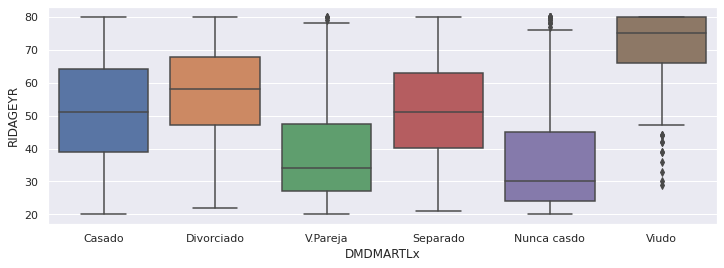

In [17]:
plt.figure(figsize=(12,4))
a = sns.boxplot(x=da.DMDMARTLx, y=da.RIDAGEYR)

Una herramienta que nos permitirá generar comparación de las distribuciones puede ser un violinplot, este mismo nos mostrará los datos de los diagramas de caja, pero nos permitirá ver las distribuciones, por ejemplo, vivir con la pareja y nunca casarse son variables que tienen una media de edad baja. Por el contrario la observación viudo tiene una inclinación hacia la izquierda, concentrandose en una media de edad más alta. Hay otras distribuciones que pueden considerarse como simetricas. También en la distribución no casados tiene un hombro largo que sugiere que muchas personas nunca se han casado porque son jovenes y aún no han alcanzado la edad donde las personas suelen casarse, pero también un numero considerable de personas se casara por primera vez en cualquier momento entre los finales de los treinta años y a medidados de los 60.

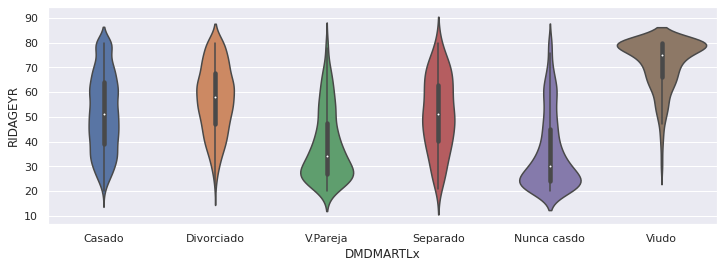

In [18]:
plt.figure(figsize=(12,4))
a = sns.violinplot(x=da.DMDMARTLx, y=da.RIDAGEYR)

# Ejercicios


1. Haga un gráfico de dispersión que muestre la relación entre la primera y la segunda medida de la presión arterial diastólica (BPXDI1 y BPXDI2). Obtenga también la matriz de 4x4 de los coeficientes de correlación entre las dos primeras medidas de presión arterial sistólica y las dos primeras medidas de presión arterial diastólica.

<AxesSubplot:xlabel='BPXDI1', ylabel='BPXDI2'>

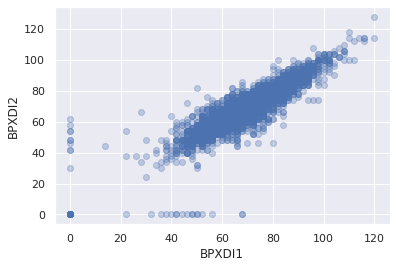

In [19]:
sns.regplot(x="BPXDI1", y="BPXDI2",data=df, fit_reg=False, scatter_kws={"alpha":0.3})

In [20]:
# Tabla 4 * 4

print(df.loc[:,["BPXDI1","BPXSY1","BPXDI2","BPXSY2"]].corr())

          BPXDI1    BPXSY1    BPXDI2    BPXSY2
BPXDI1  1.000000  0.316531  0.884722  0.329843
BPXSY1  0.316531  1.000000  0.277681  0.962287
BPXDI2  0.884722  0.277681  1.000000  0.303847
BPXSY2  0.329843  0.962287  0.303847  1.000000


In [21]:
a = df[["BPXSY1","BPXDI1"]].dropna()
r, p = stats.pearsonr(a.BPXSY1, a.BPXDI1)
print(r, p) # corroboramos que los datos generados estan bien.

0.3165311034587997 5.783981008886146e-126


P1a. ¿Cómo se relaciona la correlación entre las mediciones repetidas de la presión arterial diastólica con la correlación entre las mediciones repetidas de la presión arterial sistólica?

### Respuesta:

Las medidas de la presión arterial sistólica evidencia una dependencia casi perfecta, estando en 0.96, e igualmente, la presión arterial diastólica evidencia una asociación/correlación fuerte. 

P2a. ¿Están la segunda medida de la presión arterial sistólica y la segunda diastólica más correlacionadas o menos correlacionadas que la primera medida de la presión arterial sistólica y la primera diastólica?

D1-S1 = 0.31 -> Primera medida
D2-S2 = 0.30 -> Segunda medida

La segunda medida se encuentra menos correlacionada, pero es por un valor casi imperceptible entre ambas comparaciones. Ambos elementos de correlación son bajos, para el conjunto de mediciones estudiadas.

#### Pregunta 2
Construya una cuadrícula de gráficos de dispersión entre la primera medición de la presión arterial sistólica y la primera diastólica. Estratifique los gráficos por género (filas) y por grupos de raza/etnia (columnas).

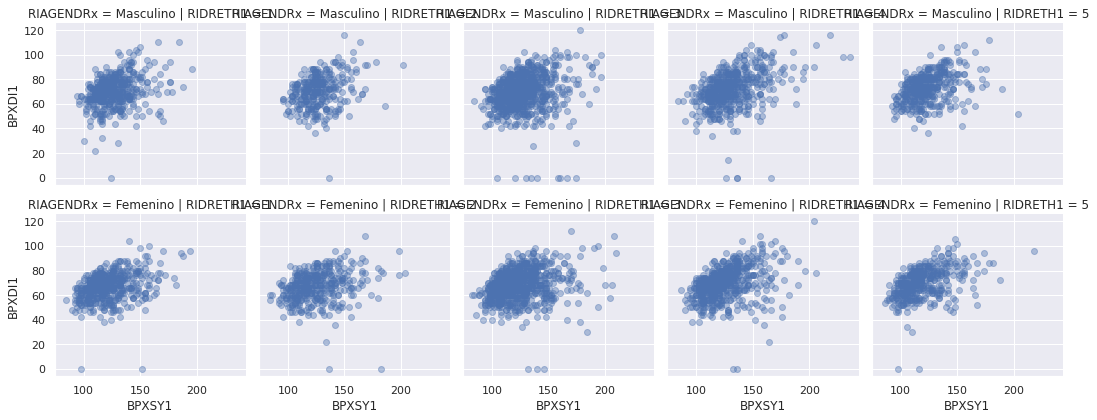

In [22]:
_ = sns.FacetGrid(df, col="RIDRETH1",row="RIAGENDRx").map(plt.scatter, "BPXSY1","BPXDI1",alpha=0.4).add_legend()

P3a. Comente hasta qué punto estas dos variables de presión arterial están correlacionadas en distinto grado en los diferentes subgrupos demográficos

Se observa que la asociación en masomenos casi todos los grupos étnicos por género es similiar, y se evidencia que el grupo número 2 y 5 presentan menos observaciones en comparación con otros grupos. La correlación por grupos étnicos en la mayoría de los casos es baja.

#### Pregunta 3
Utilice los "gráficos de violín" para comparar las distribuciones de las edades dentro de los grupos definidos por el género y el nivel de estudios.

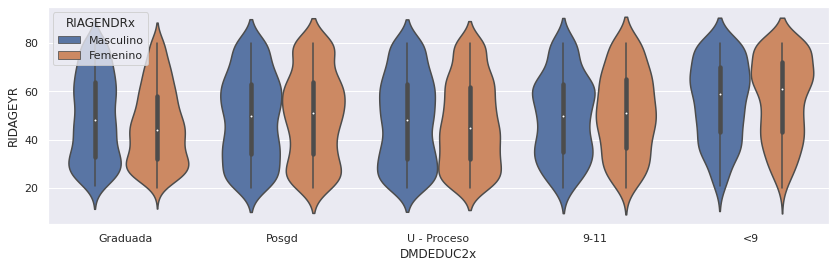

In [23]:
# edades - género - nivel de estudios
plt.figure(figsize=(14,4))
a = sns.violinplot(x=da.DMDEDUC2x, y=da.RIDAGEYR, hue=da.RIAGENDRx)

P4a. Comente cualquier diferencia evidente entre las distribuciones de edad en los distintos grupos demográficos.

En el conjunto de datos podemos observar que las distribuciones comparadas por género y nivel de estudios son casi simetricas en su distribución, en el nivel educativo "Graduada" observamos que hay una ligerá distribución sesgada hacia la derecha más pronunciada en el grupo del género femenino, con un hombro más grande que el masculino, indicando que un mayor numero de mujeres se graduan a edades más tempranas que los hombres, en el nivel educativo posgrado, vemos que hay una distribución similar, presentando mayor concentración de participación femenina y masculina en edades que rondan entre los 50 y 60 años, por ultimo, vemos una distribución sesgada a la izquierda de ambos genero de las personas que  llegaron al grado "<9", evidenciando que las personas mayores son las que se encuentran en este grupo. 

#### Pregunta 4
Utilice gráficos de violín para comparar las distribuciones del IMC dentro de una serie de bandas de edad de 10 años. Estratifique también estos gráficos por género.

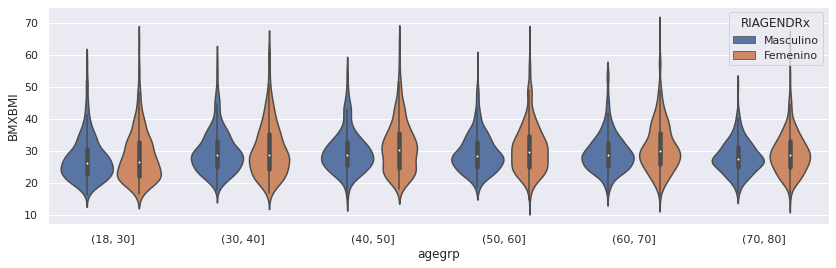

In [24]:
# Cortamos rango de edad por 10 años
# se crea columna agegrp en data
df["agegrp"] = pd.cut(df.RIDAGEYR, [18,30,40,50,60,70,80])
da = df.loc[:,["agegrp","BMXBMI","RIAGENDRx"]].dropna()
plt.figure(figsize=(14,4))
a = sns.violinplot( x=da.agegrp,y=da.BMXBMI, hue=da.RIAGENDRx)

En todo los conjuntos por rangos de edades, el género femenino suele tener una cola más larga hacia la derecha respecto al género masculino, a medida que los grupos etarios aumentan, poco a poco el el IMC tambien lo hace, y en grupo de los años 50 a 60 este comienza a bajar nuevamente.

#### Pregunta 5
Construya una tabla de frecuencias para la distribución conjunta de los grupos étnicos (RIDRETH1) y el estado de seguro de salud (HIQ210). Normalice los resultados para que los valores dentro de cada grupo étnico sean proporciones que sumen 1.

In [41]:
# Normalizar - > h = hispano , M = Multiracial
df.RIDRETH1x = df.RIDRETH1.replace({1:"Mexicano",2:"Otro-h", 3: "Blanco-No-h",
                                     4:"Afro-No-h", 5:"Otra Raza/M"})
# Desafiliado -> Estuvo desafiliado hace  menos de 12 meses
# Afiliado en el ultimo año
# Desconoce
df.HIQ210x = df.HIQ210.replace({1: "Desafiliado/12M", 2:"Afiliado/12M",7:"Rechaza",
                                9:"Desconoce"})
x = pd.crosstab(df.HIQ210x, df.RIDRETH1x)
x.apply(lambda z:(z/z.sum()), axis=0) 

RIDRETH1,Afro-No-h,Blanco-No-h,Mexicano,Otra Raza/M,Otro-h
HIQ210,,,,,
Afiliado/12M,0.890385,0.931432,0.857567,0.915723,0.871304
Desafiliado/12M,0.108654,0.067354,0.137982,0.081761,0.128696
Desconoce,0.000962,0.001214,0.004451,0.002516,0.000000


¿Qué grupo étnico tiene la mayor tasa de no asegurados en el último año?


El grupo étnico con una tasa de personas afiliadas/aseguradas en el ultimo año, son las personas que se perciben y autoreconocen como personas blancas no hispanas, con un 93%, le es seguido por otras razas no hispanas con un 91%. 